In [73]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
from appliance_thermal_model import ThermalAppliance

In [3]:
fridge = ThermalAppliance(id=1, name="fridge",
                          idle_power=5, active_power=250,
                          loss_idle=0.05612568731830647, # 50% in 12 hours
                          loss_active=0.8, # 80% in 1 hour
                          heat_factor=-0.001111111111, # -4K in 1 hour
                          target_temp=4, env_temp=22
                         )
fridge.inner_temp = 4
time_step = 60
total_time = 3600 * 24
usage_times = [7, 8, 12, 12.5, 16, 16.5, 19.5, 20] # door open times
usage_duration = 120 # how many seconds is the door open?
x = []
temp = []
pump = []
use = []
t = 0
for _ in range(0, total_time, time_step):
    fridge.in_use = False
    for usage_time in usage_times:
        ut = usage_time * 3600
        if t >= ut and t < ut + usage_duration:
            fridge.in_use = True
            break
    x += [t]
    temp += [fridge.inner_temp]
    pump += [1 if fridge.pump_running else 0]
    use += [1 if fridge.in_use else 0]

    fridge.step(time_step)
    t += time_step

x = np.asarray(x)
temp = np.asarray(temp)
pump = np.asarray(pump)
use = np.asarray(use)

TypeError: __init__() missing 1 required positional argument: 'program_duration_sec'

In [ ]:
plt.plot(x/3600, temp, label="inner_temp")
plt.plot(x/3600, pump, label="pump_running")
plt.plot(x/3600, use, label="in_use")
plt.legend()
plt.show()

In [176]:
import json
import helpers.plotting

from importlib import reload
reload(helpers.plotting)
plot_glob = helpers.plotting.plot_glob

<IPython.core.display.Javascript object>


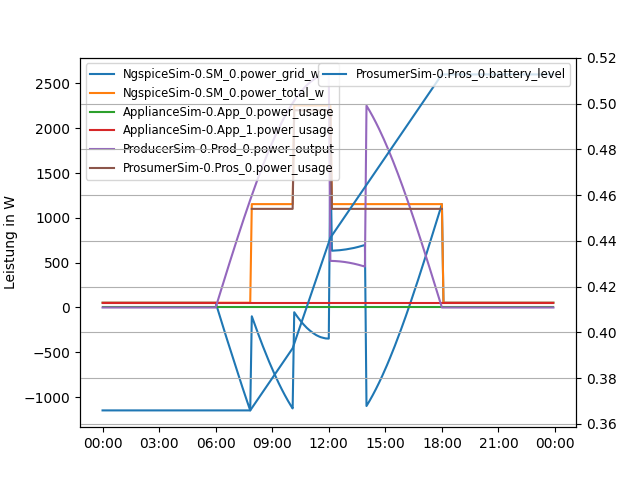

Ignored data series opt_power_modes: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (288, 2) + inhomogeneous part.


In [180]:
collected = json.load(open('collected.json'))
fig = plot_glob(collected, r'power', r'battery')
fig.savefig('saved.pdf')

In [175]:
npr

{'NgspiceSim-0.SM_0.power_grid_w': array([[ 0.000e+00,  5.300e+01],
        [ 1.000e+00,  5.300e+01],
        [ 2.000e+00,  5.300e+01],
        [ 3.000e+00,  5.300e+01],
        [ 4.000e+00,  5.300e+01],
        [ 5.000e+00,  5.300e+01],
        [ 6.000e+00,  5.300e+01],
        [ 7.000e+00,  5.300e+01],
        [ 8.000e+00,  5.300e+01],
        [ 9.000e+00,  5.300e+01],
        [ 1.000e+01,  5.300e+01],
        [ 1.100e+01,  5.300e+01],
        [ 1.200e+01,  5.300e+01],
        [ 1.300e+01,  5.300e+01],
        [ 1.400e+01,  5.300e+01],
        [ 1.500e+01,  5.300e+01],
        [ 1.600e+01,  5.300e+01],
        [ 1.700e+01,  5.300e+01],
        [ 1.800e+01,  5.300e+01],
        [ 1.900e+01,  5.300e+01],
        [ 2.000e+01,  5.300e+01],
        [ 2.100e+01,  5.300e+01],
        [ 2.200e+01,  5.300e+01],
        [ 2.300e+01,  5.300e+01],
        [ 2.400e+01,  5.300e+01],
        [ 2.500e+01,  5.300e+01],
        [ 2.600e+01,  5.300e+01],
        [ 2.700e+01,  5.300e+01],
        [ 2.80

In [140]:
arr.shape

(4, 2)